In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.ticker import PercentFormatter
#import matplotlib.ticker as tkr
#from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import apriori, association_rules
#import kagglehub
#from kagglehub import KaggleDatasetAdapter
#import os
#import sqlite3
import seaborn as sns
#import time
#import json
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df1 = pd.read_csv('sales_data.csv',low_memory=False)  #readong the data
df1

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.352480e+12,Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,2.674213e+12,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,319669,Wired Headphones,5.216304e+12,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [4]:
df1 = df1.drop(columns=["Product_ean"])  #drop ean because not needed
df1.head()

,Order Date,Order ID,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [5]:
df1 = df1.rename(columns={"catégorie": "Categories"})

In [6]:
df1["Order Date"] = pd.to_datetime(df1["Order Date"], errors="coerce")  #converting to datetime
df1["Month"] = df1["Order Date"].dt.month

In [7]:
df1[["Order Date", "Month"]].sample(10)

,Order Date,Month
162138,2019-12-23 23:34:00,12
177435,2019-12-12 19:24:00,12
134436,2019-10-09 20:03:00,10
944,2019-01-17 08:09:00,1
45877,2019-04-09 08:12:00,4
157111,2019-11-26 20:01:00,11
79169,2019-06-02 20:52:00,6
18012,2019-02-10 21:18:00,2
94866,2019-07-26 17:20:00,7
33444,2019-03-29 12:24:00,3


In [8]:
df1["Margin_pct_%"] = ((df1["Price Each"] - df1["Cost price"]) / df1["Price Each"]).round(2)  #finding the percentage margin
df1.head()

,Order Date,Order ID,Product,Categories,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Month,Margin_pct_%
0,2019-01-22 21:25:00,141234,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,1,0.67
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,1,0.50
2,2019-01-17 13:33:00,141236,Wired Headphones,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,1,0.50
3,2019-01-05 20:33:00,141237,27in FHD Monitor,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,1,0.35
4,2019-01-25 11:59:00,141238,Wired Headphones,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,1,0.50


In [9]:
df1["City"] = df1["Purchase Address"].astype(str).str.rsplit(", ", n=2).str[1]   #extract the City
df1

,Order Date,Order ID,Product,Categories,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Month,Margin_pct_%,City
0,2019-01-22 21:25:00,141234,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,1,0.67,Boston
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,1,0.50,Portland
2,2019-01-17 13:33:00,141236,Wired Headphones,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,1,0.50,San Francisco
3,2019-01-05 20:33:00,141237,27in FHD Monitor,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,1,0.35,Los Angeles
4,2019-01-25 11:59:00,141238,Wired Headphones,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,1,0.50,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750,12,0.50,San Francisco
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400,12,0.50,Los Angeles
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000,12,0.67,Seattle
185948,2019-12-03 10:39:00,319669,Wired Headphones,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950,12,0.50,Dallas


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order Date        185950 non-null  datetime64[ns]
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Categories        185950 non-null  object        
 4   Purchase Address  185950 non-null  object        
 5   Quantity Ordered  185950 non-null  int64         
 6   Price Each        185950 non-null  float64       
 7   Cost price        185950 non-null  float64       
 8   turnover          185950 non-null  float64       
 9   margin            185950 non-null  float64       
 10  Month             185950 non-null  int64         
 11  Margin_pct_%      185950 non-null  float64       
 12  City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memor

In [11]:
df1["Hour"] = df1["Order Date"].dt.hour
df1[["Order Date", "Hour"]].sample(10)

,Order Date,Hour
8939,2019-01-30 05:07:00,5
72048,2019-06-17 13:47:00,13
74375,2019-06-23 00:42:00,0
135003,2019-10-03 13:44:00,13
102526,2019-08-18 21:02:00,21
93202,2019-07-07 22:47:00,22
28994,2019-03-26 23:16:00,23
109622,2019-08-27 20:38:00,20
129734,2019-10-06 09:50:00,9
66953,2019-05-02 21:35:00,21


In [12]:
df1["Weekday"] = df1["Order Date"].dt.day_name()
df1[["Order Date", "Weekday"]].sample(10)

,Order Date,Weekday
93448,2019-07-11 19:29:00,Thursday
183276,2019-12-17 16:19:00,Tuesday
78854,2019-06-18 14:33:00,Tuesday
7990,2019-01-23 15:33:00,Wednesday
70209,2019-05-06 16:44:00,Monday
111114,2019-08-07 13:02:00,Wednesday
120434,2019-09-04 19:11:00,Wednesday
146830,2019-11-28 13:52:00,Thursday
177594,2019-12-09 09:30:00,Monday
123508,2019-10-10 15:14:00,Thursday


In [13]:
df1 = df1.rename(columns={"Cost price": "Cost price ($)"})   #making it more readable
df1 = df1.rename(columns={"Price Each": "Price Each ($)"})
df1 = df1.rename(columns={"turnover": "Τurnover ($)"})
df1 = df1.rename(columns={"margin": "Μargin ($)"})
df1.sample(10)

,Order Date,Order ID,Product,Categories,Purchase Address,Quantity Ordered,Price Each ($),Cost price ($),Τurnover ($),Μargin ($),Month,Margin_pct_%,City,Hour,Weekday
132701,2019-10-10 21:08:00,268562,USB-C Charging Cable,Sports,"8 Adams St, Los Angeles, CA 90001",1,11.95,5.975,11.95,5.975,10,0.5,Los Angeles,21,Thursday
25618,2019-03-07 09:59:00,165786,AAA Batteries (4-pack),Alimentation,"842 Meadow St, New York City, NY 10001",1,2.99,1.495,2.99,1.495,3,0.5,New York City,9,Thursday
50814,2019-04-09 12:36:00,189970,Lightning Charging Cable,Vêtements,"63 Center St, Boston, MA 02215",1,14.95,7.475,14.95,7.475,4,0.5,Boston,12,Tuesday
174096,2019-12-13 22:22:00,308270,USB-C Charging Cable,Vêtements,"339 Madison St, Austin, TX 73301",1,11.95,5.975,11.95,5.975,12,0.5,Austin,22,Friday
5362,2019-01-21 17:32:00,146355,AAA Batteries (4-pack),Alimentation,"291 Pine St, San Francisco, CA 94016",1,2.99,1.495,2.99,1.495,1,0.5,San Francisco,17,Monday
51072,2019-04-23 18:33:00,190220,AA Batteries (4-pack),Alimentation,"675 Jackson St, Los Angeles, CA 90001",1,3.84,1.920,3.84,1.920,4,0.5,Los Angeles,18,Tuesday
52706,2019-04-09 15:26:00,191789,AAA Batteries (4-pack),Électronique,"595 Jackson St, Boston, MA 02215",1,2.99,1.495,2.99,1.495,4,0.5,Boston,15,Tuesday
7847,2019-01-26 19:40:00,148744,AAA Batteries (4-pack),Électronique,"982 Hill St, San Francisco, CA 94016",3,2.99,1.495,8.97,4.485,1,0.5,San Francisco,19,Saturday
26132,2019-03-16 23:52:00,166281,USB-C Charging Cable,Vêtements,"424 5th St, Boston, MA 02215",1,11.95,5.975,11.95,5.975,3,0.5,Boston,23,Saturday
9507,2019-01-15 10:05:00,150330,AAA Batteries (4-pack),Vêtements,"520 Forest St, Los Angeles, CA 90001",1,2.99,1.495,2.99,1.495,1,0.5,Los Angeles,10,Tuesday


In [14]:
df1.columns

Index(['Order Date', 'Order ID', 'Product', 'Categories', 'Purchase Address',
       'Quantity Ordered', 'Price Each ($)', 'Cost price ($)', 'Τurnover ($)',
       'Μargin ($)', 'Month', 'Margin_pct_%', 'City', 'Hour', 'Weekday'],
      dtype='object')

In [15]:
#give the 'correct' order
df2 = df1[["Order ID", "Order Date", "Month", "Weekday", "Hour","Product", "Categories", "Quantity Ordered", "Price Each ($)", "Cost price ($)", 'Τurnover ($)', 'Μargin ($)', "Margin_pct_%", "Purchase Address", "City"]]
df2.sample(10)

,Order ID,Order Date,Month,Weekday,Hour,Product,Categories,Quantity Ordered,Price Each ($),Cost price ($),Τurnover ($),Μargin ($),Margin_pct_%,Purchase Address,City
86953,224588,2019-07-05 15:44:00,7,Friday,15,Lightning Charging Cable,Alimentation,1,14.95,7.4750,14.95,7.4750,0.50,"771 8th St, Boston, MA 02215",Boston
46111,185466,2019-04-26 18:59:00,4,Friday,18,AAA Batteries (4-pack),Électronique,2,2.99,1.4950,5.98,2.9900,0.50,"388 11th St, Austin, TX 73301",Austin
39635,179267,2019-04-27 23:47:00,4,Saturday,23,27in FHD Monitor,Vêtements,1,149.99,97.4935,149.99,52.4965,0.35,"671 West St, Boston, MA 02215",Boston
112510,249155,2019-09-06 19:22:00,9,Friday,19,USB-C Charging Cable,Alimentation,1,11.95,5.9750,11.95,5.9750,0.50,"139 Highland St, Dallas, TX 75001",Dallas
84856,222560,2019-06-10 01:09:00,6,Monday,1,Bose SoundSport Headphones,Vêtements,1,99.99,49.9950,99.99,49.9950,0.50,"2 Elm St, Boston, MA 02215",Boston
160642,295354,2019-11-12 22:37:00,11,Tuesday,22,34in Ultrawide Monitor,Alimentation,1,379.99,125.3967,379.99,254.5933,0.67,"243 Cedar St, New York City, NY 10001",New York City
123004,259272,2019-09-12 10:53:00,9,Thursday,10,AAA Batteries (4-pack),Alimentation,1,2.99,1.4950,2.99,1.4950,0.50,"759 Lakeview St, Los Angeles, CA 90001",Los Angeles
106573,243461,2019-08-09 17:58:00,8,Friday,17,Flatscreen TV,Vêtements,1,300.00,99.0000,300.00,201.0000,0.67,"481 9th St, San Francisco, CA 94016",San Francisco
58285,197121,2019-05-29 06:39:00,5,Wednesday,6,Bose SoundSport Headphones,Alimentation,1,99.99,49.9950,99.99,49.9950,0.50,"359 Cedar St, Dallas, TX 75001",Dallas
47874,187162,2019-04-11 14:40:00,4,Thursday,14,AAA Batteries (4-pack),Vêtements,1,2.99,1.4950,2.99,1.4950,0.50,"293 Sunset St, Boston, MA 02215",Boston


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Order Date        185950 non-null  datetime64[ns]
 2   Month             185950 non-null  int64         
 3   Weekday           185950 non-null  object        
 4   Hour              185950 non-null  int64         
 5   Product           185950 non-null  object        
 6   Categories        185950 non-null  object        
 7   Quantity Ordered  185950 non-null  int64         
 8   Price Each ($)    185950 non-null  float64       
 9   Cost price ($)    185950 non-null  float64       
 10  Τurnover ($)      185950 non-null  float64       
 11  Μargin ($)        185950 non-null  float64       
 12  Margin_pct_%      185950 non-null  float64       
 13  Purchase Address  185950 non-null  object        
 14  City

In [17]:
#bringing product names close to real ones
products_updated={'iPhone':'iPhone XS',
                  'Wired Headphones':'SoundMagic E11D Wired Earphones',
                  'Flatscreen TV':'Samsung GU50U7099FUXZG (50″ 4K Ultra HD) TV',
                  'Vareebadd Phone':'Refurbished Phone',
                  'Google Phone':'Google Pixel 3a XL',
                  'ThinkPad Laptop':'Lenovo ThinkPad X1 Carbon',
                  'LG Dryer':'LG RH90V9AV2N 9kg Dryer',
                  'LG Washing Machine':'LG F4X1008NWK 8kg Front Load Washer'}

In [18]:
df2["Product"] = df2["Product"].replace(products_updated)

In [19]:
df2

,Order ID,Order Date,Month,Weekday,Hour,Product,Categories,Quantity Ordered,Price Each ($),Cost price ($),Τurnover ($),Μargin ($),Margin_pct_%,Purchase Address,City
0,141234,2019-01-22 21:25:00,1,Tuesday,21,iPhone XS,Vêtements,1,700.00,231.0000,700.00,469.0000,0.67,"944 Walnut St, Boston, MA 02215",Boston
1,141235,2019-01-28 14:15:00,1,Monday,14,Lightning Charging Cable,Alimentation,1,14.95,7.4750,14.95,7.4750,0.50,"185 Maple St, Portland, OR 97035",Portland
2,141236,2019-01-17 13:33:00,1,Thursday,13,SoundMagic E11D Wired Earphones,Vêtements,2,11.99,5.9950,23.98,11.9900,0.50,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237,2019-01-05 20:33:00,1,Saturday,20,27in FHD Monitor,Sports,1,149.99,97.4935,149.99,52.4965,0.35,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238,2019-01-25 11:59:00,1,Friday,11,SoundMagic E11D Wired Earphones,Électronique,1,11.99,5.9950,11.99,5.9950,0.50,"387 10th St, Austin, TX 73301",Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,319666,2019-12-11 20:58:00,12,Wednesday,20,Lightning Charging Cable,Électronique,1,14.95,7.4750,14.95,7.4750,0.50,"14 Madison St, San Francisco, CA 94016",San Francisco
185946,319667,2019-12-01 12:01:00,12,Sunday,12,AA Batteries (4-pack),Électronique,2,3.84,1.9200,7.68,3.8400,0.50,"549 Willow St, Los Angeles, CA 90001",Los Angeles
185947,319668,2019-12-09 06:43:00,12,Monday,6,Refurbished Phone,Alimentation,1,400.00,132.0000,400.00,268.0000,0.67,"273 Wilson St, Seattle, WA 98101",Seattle
185948,319669,2019-12-03 10:39:00,12,Tuesday,10,SoundMagic E11D Wired Earphones,Alimentation,1,11.99,5.9950,11.99,5.9950,0.50,"778 River St, Dallas, TX 75001",Dallas


In [20]:
month_map = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"}
df2["Month"] = df2["Month"].map(month_map)

In [21]:
#same as products above
product_to_category = {
    'AAA Batteries (4-pack)': 'Batteries',
    'AA Batteries (4-pack)': 'Batteries',
    'LG RH90V9AV2N 9kg Dryer': 'Home Appliances',
    'LG F4X1008NWK 8kg Front Load Washer': 'Home Appliances',
    'Macbook Pro Laptop': 'Laptops',
    'Lenovo ThinkPad X1 Carbon': 'Laptops',
    'Lightning Charging Cable': 'Mobile Accessories',
    'SoundMagic E11D Wired Earphones': 'Mobile Accessories',
    'USB-C Charging Cable': 'Mobile Accessories',
    'Bose SoundSport Headphones': 'Mobile Accessories',
    'Apple Airpods Headphones': 'Mobile Accessories',
    '27in FHD Monitor': 'Monitors',
    '27in 4K Gaming Monitor': 'Monitors',
    'Samsung GU50U7099FUXZG (50″ 4K Ultra HD) TV': 'Monitors',
    '20in Monitor': 'Monitors',
    '34in Ultrawide Monitor': 'Monitors',
    'iPhone XS': 'Phones',
    'Google Pixel 3a XL': 'Phones',
    'Refurbished Phone': 'Refurbished Phones'}

In [22]:
df2["Categories"] = df2["Product"].map(product_to_category)
df2.sample(5)

,Order ID,Order Date,Month,Weekday,Hour,Product,Categories,Quantity Ordered,Price Each ($),Cost price ($),Τurnover ($),Μargin ($),Margin_pct_%,Purchase Address,City
25643,165810,2019-03-24 12:15:00,March,Sunday,12,Bose SoundSport Headphones,Mobile Accessories,1,99.99,49.995,99.99,49.995,0.5,"748 4th St, Boston, MA 02215",Boston
105129,242083,2019-08-08 13:08:00,August,Thursday,13,USB-C Charging Cable,Mobile Accessories,1,11.95,5.975,11.95,5.975,0.5,"812 2nd St, San Francisco, CA 94016",San Francisco
185,141415,2019-01-12 19:02:00,January,Saturday,19,SoundMagic E11D Wired Earphones,Mobile Accessories,1,11.99,5.995,11.99,5.995,0.5,"81 Madison St, San Francisco, CA 94016",San Francisco
184494,318264,2019-12-11 12:49:00,December,Wednesday,12,USB-C Charging Cable,Mobile Accessories,1,11.95,5.975,11.95,5.975,0.5,"692 5th St, Seattle, WA 98101",Seattle
139244,274829,2019-10-28 16:30:00,October,Monday,16,Bose SoundSport Headphones,Mobile Accessories,1,99.99,49.995,99.99,49.995,0.5,"314 Hill St, San Francisco, CA 94016",San Francisco


In [23]:
df2 = df2[df2["Order Date"] < "2020-01-01"]  #keeping only the sales between 01-01-2019 and 01-01-2020

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185916 entries, 0 to 185949
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  int64         
 1   Order Date        185916 non-null  datetime64[ns]
 2   Month             185916 non-null  object        
 3   Weekday           185916 non-null  object        
 4   Hour              185916 non-null  int64         
 5   Product           185916 non-null  object        
 6   Categories        185916 non-null  object        
 7   Quantity Ordered  185916 non-null  int64         
 8   Price Each ($)    185916 non-null  float64       
 9   Cost price ($)    185916 non-null  float64       
 10  Τurnover ($)      185916 non-null  float64       
 11  Μargin ($)        185916 non-null  float64       
 12  Margin_pct_%      185916 non-null  float64       
 13  Purchase Address  185916 non-null  object        
 14  City

In [25]:
df2.to_excel("sales_clean1.xlsx", index=False)

In [26]:
df_to_plot = df2.copy()
df_to_plot.sample(5)

,Order ID,Order Date,Month,Weekday,Hour,Product,Categories,Quantity Ordered,Price Each ($),Cost price ($),Τurnover ($),Μargin ($),Margin_pct_%,Purchase Address,City
102368,239420,2019-08-18 14:35:00,August,Sunday,14,iPhone XS,Phones,1,700.00,231.0000,700.00,469.0000,0.67,"845 10th St, Boston, MA 02215",Boston
11720,152457,2019-02-12 14:49:00,February,Tuesday,14,Apple Airpods Headphones,Mobile Accessories,1,150.00,97.5000,150.00,52.5000,0.35,"594 Hickory St, Portland, ME 04101",Portland
92377,229794,2019-07-03 09:26:00,July,Wednesday,9,AAA Batteries (4-pack),Batteries,1,2.99,1.4950,2.99,1.4950,0.50,"796 Washington St, Boston, MA 02215",Boston
107230,244089,2019-08-12 11:15:00,August,Monday,11,27in FHD Monitor,Monitors,1,149.99,97.4935,149.99,52.4965,0.35,"33 Lincoln St, San Francisco, CA 94016",San Francisco
160215,294943,2019-11-30 19:56:00,November,Saturday,19,AA Batteries (4-pack),Batteries,1,3.84,1.9200,3.84,1.9200,0.50,"101 13th St, Boston, MA 02215",Boston


In [27]:
df_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185916 entries, 0 to 185949
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  int64         
 1   Order Date        185916 non-null  datetime64[ns]
 2   Month             185916 non-null  object        
 3   Weekday           185916 non-null  object        
 4   Hour              185916 non-null  int64         
 5   Product           185916 non-null  object        
 6   Categories        185916 non-null  object        
 7   Quantity Ordered  185916 non-null  int64         
 8   Price Each ($)    185916 non-null  float64       
 9   Cost price ($)    185916 non-null  float64       
 10  Τurnover ($)      185916 non-null  float64       
 11  Μargin ($)        185916 non-null  float64       
 12  Margin_pct_%      185916 non-null  float64       
 13  Purchase Address  185916 non-null  object        
 14  City

In [28]:
#correcting the order for the days of week and months

In [29]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_to_plot["Weekday"] = pd.Categorical(df_to_plot["Weekday"], categories=weekday_order, ordered=True)

In [30]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"]
df_to_plot["Month"] = pd.Categorical(df_to_plot["Month"], categories=month_order, ordered=True)

In [31]:
kpis = pd.DataFrame([{
    "Total Orders": df_to_plot["Order ID"].nunique(),
    "Total Units Sold": df_to_plot["Quantity Ordered"].sum(),
    "Total Turnover": df_to_plot["Τurnover ($)"].sum(),
    "Total Margin": df_to_plot["Μargin ($)"].sum(),
    "Margin": df_to_plot["Μargin ($)"].sum() / df_to_plot["Τurnover ($)"].sum()
}])

kpis.style.format({
    "Total Orders": "{:,.0f}",
    "Total Units Sold": "{:,.0f}",
    "Total Turnover": "${:,.2f}",
    "Total Margin": "${:,.2f}",
    "Margin": "{:.2%}"
}).hide(axis="index")

Total Orders,Total Units Sold,Total Turnover,Total Margin,Margin
"178,406","209,038","$34,483,365.68","$21,432,785.48",62.15%


In [32]:
monthly = (
    df_to_plot.groupby("Month", as_index=False)
      .agg(
          turnover=("Τurnover ($)", "sum"),
          margin=("Μargin ($)", "sum"),
          orders=("Order ID", "nunique")      )
      .sort_values("Month"))

fig = px.line(
    monthly,
    x="Month",
    y=["turnover", "margin"],
    markers=True,
    title="Monthly Turnover and Margin Trend",
    labels={"value": "Amount ($)", "variable": "Metric", "Month": "Month"}
)
fig.show()

In [33]:
cat = (
    df_to_plot.groupby("Categories", as_index=False)
      .agg(
          turnover=("Τurnover ($)", "sum"),
          units=("Quantity Ordered", "sum"))
      .sort_values("turnover", ascending=False))

fig = go.Figure()

# Bars: Turnover
fig.add_bar(x=cat["Categories"], y=cat["turnover"], name="Turnover ($)")

# Line: Units 
fig.add_trace(go.Scatter(x=cat["Categories"], y=cat["units"], name="Units Sold", yaxis="y2"))

fig.update_layout(
    title="Turnover ($) and Units Sold by Category",
    xaxis_title="Category",
    yaxis=dict(title="Τurnover ($)"),
    yaxis2=dict(title="Units Sold", overlaying="y", side="right"),
    legend_title="")

fig.show()

In [34]:
cat_profit = (
    df_to_plot.groupby("Categories", as_index=False)
      .agg(
          turnover=("Τurnover ($)", "sum"),
          margin=("Μargin ($)", "sum")))

cat_profit["margin_pct"] = cat_profit["margin"] / cat_profit["turnover"]
cat_profit = cat_profit.sort_values("margin_pct", ascending=False)

fig = px.bar(
    cat_profit,
    x="Categories",
    y="margin_pct",
    title="Margin (%) by Category",
    labels={"margin_pct": "Margin %", "Categories": "Category"})
fig.update_yaxes(tickformat=".0%")

fig.show()

In [35]:
prod = (
    df_to_plot.groupby("Product", as_index=False)
      .agg(
          turnover=("Τurnover ($)", "sum"),
          margin=("Μargin ($)", "sum"),
          units=("Quantity Ordered", "sum")))

top10_turnover = prod.sort_values("turnover", ascending=False).head(10)

fig = px.bar(
    top10_turnover,
    x="Product",
    y="turnover",
    title="Top 10 Products by Τurnover ($)",
    labels={"turnover": "Τurnover ($)", "Product": "Product"})

fig.show()

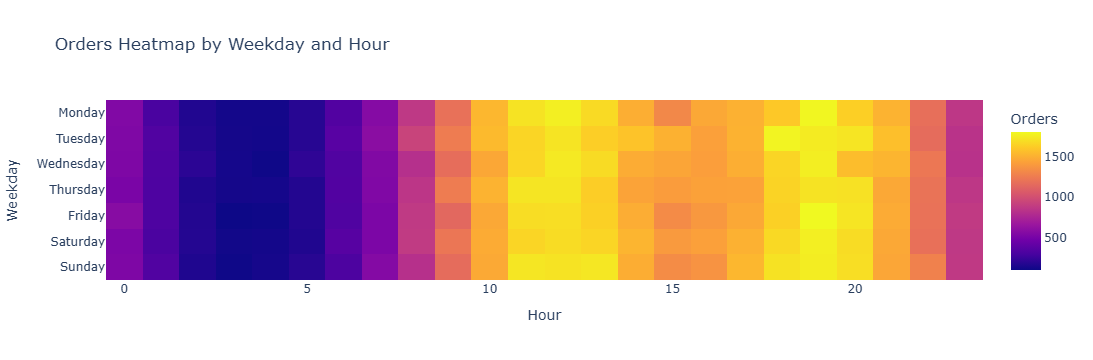

In [36]:
heat = (
    df_to_plot.groupby(["Weekday", "Hour"], as_index=False)
      .agg(orders=("Order ID", "nunique")))

heat_pivot = heat.pivot(index="Weekday", columns="Hour", values="orders").fillna(0)

fig = px.imshow(
    heat_pivot,
    title="Orders Heatmap by Weekday and Hour",
    aspect="auto",
    labels=dict(x="Hour", y="Weekday", color="Orders"))

fig.show()

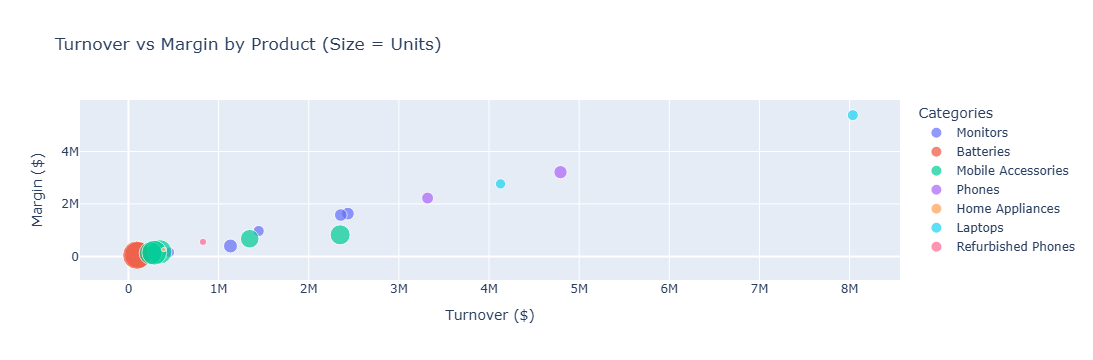

In [37]:
prod_scatter = (
    df_to_plot.groupby(["Product", "Categories"], as_index=False)
      .agg(
          turnover=("Τurnover ($)", "sum"),
          margin=("Μargin ($)", "sum"),
          units=("Quantity Ordered", "sum")))

fig = px.scatter(
    prod_scatter,
    x="turnover",
    y="margin",
    size="units",
    color="Categories",
    hover_name="Product",
    title="Turnover vs Margin by Product (Size = Units)",
    labels={"turnover": "Τurnover ($)", "margin": "Μargin ($)"})

fig.show()